In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
# import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [99]:
df = pd.read_csv('combined_df_final.csv')
df

,from,to,Y,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,Jaccard_Coefficient,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends
0,134467,118071,0,495,14236,1,0,0.000000,0.000000,14240,0,0
1,360019,1209763,0,110,1951,1,0,0.000000,0.000000,1957,0,0
2,3471496,2785636,0,13,27,2,0,0.000000,0.000000,66,0,0
3,1859805,4116916,0,24,91,1,0,0.000000,0.000000,99,0,0
4,2888367,1054895,0,17,39,1,0,0.000000,0.000000,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,63691,4807146,1,286,13198,3,0,0.000000,0.000000,39675,0,0
199996,2882075,1625297,1,668,37638,39,0,0.000847,0.026367,1472913,0,0
199997,2150983,4286292,1,337,49384,1,0,0.000000,0.000000,49587,0,0
199998,2855754,2169630,1,493,2435,425,2972,0.066382,0.125044,7480473,1,1


In [100]:
X = df[['from', 'to','SrcOutegree','SrcIndegree','Jaccard_Coefficient','Preferential_Attachment_Score']]
y = df['Y']

In [101]:
X

,from,to,SrcOutegree,SrcIndegree,Jaccard_Coefficient,Preferential_Attachment_Score
0,134467,118071,14236,495,0.000000,14240
1,360019,1209763,1951,110,0.000000,1957
2,3471496,2785636,27,13,0.000000,66
3,1859805,4116916,91,24,0.000000,99
4,2888367,1054895,39,17,0.000000,40
...,...,...,...,...,...,...
199995,63691,4807146,13198,286,0.000000,39675
199996,2882075,1625297,37638,668,0.000847,1472913
199997,2150983,4286292,49384,337,0.000000,49587
199998,2855754,2169630,2435,493,0.066382,7480473


In [102]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    1
199996    1
199997    1
199998    1
199999    1
Name: Y, Length: 200000, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estimators =  10 Train Score 0.9307654956267302 test Score 0.9308201526100358
Estimators =  50 Train Score 0.9321179110875759 test Score 0.9319525132609245
Estimators =  100 Train Score 0.9320334472625458 test Score 0.9318807977150367
Estimators =  250 Train Score 0.9315652409687935 test Score 0.9320088969770498
Estimators =  450 Train Score 0.9317032572098713 test Score 0.9322517878351402


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

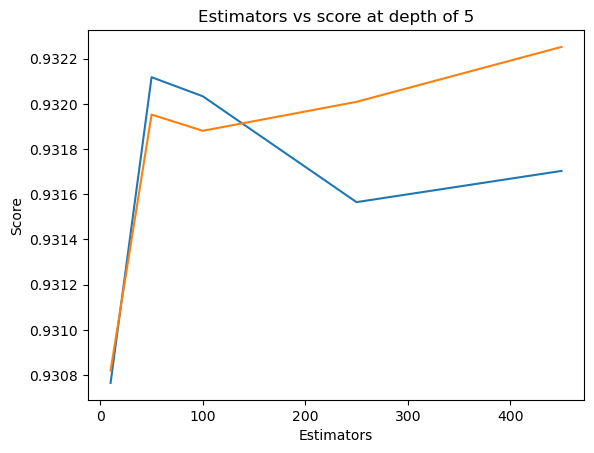

In [104]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.926922979702232 test Score 0.9277635806998457
depth =  9 Train Score 0.9379476141927525 test Score 0.9364827011885836
depth =  11 Train Score 0.9390279971556047 test Score 0.9367305751765892
depth =  15 Train Score 0.9392019030477712 test Score 0.9363354428783943
depth =  20 Train Score 0.9393371250251661 test Score 0.9361573373676249
depth =  35 Train Score 0.9393363616916862 test Score 0.9362313724501373
depth =  50 Train Score 0.9393363616916862 test Score 0.9362313724501373
depth =  70 Train Score 0.9393363616916862 test Score 0.9362313724501373
depth =  130 Train Score 0.9393363616916862 test Score 0.9362313724501373


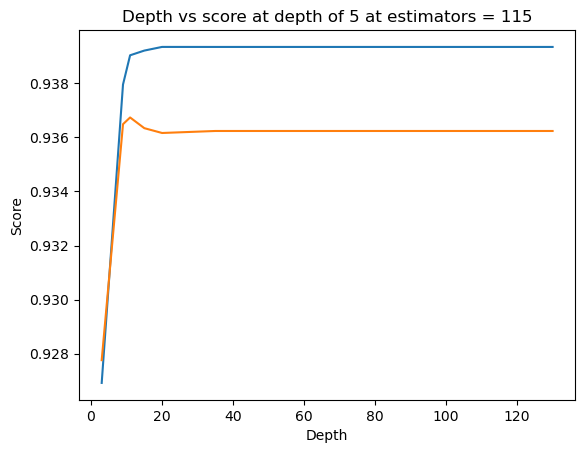

In [105]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [106]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.93647625 0.93666348 0.93623369 0.93618434 0.93681042]


KeyError: 'mean_train_score'

In [107]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [108]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [109]:
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [110]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9404545368721167
Test f1 score 0.9366360609423873


In [111]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

Train confusion_matrix


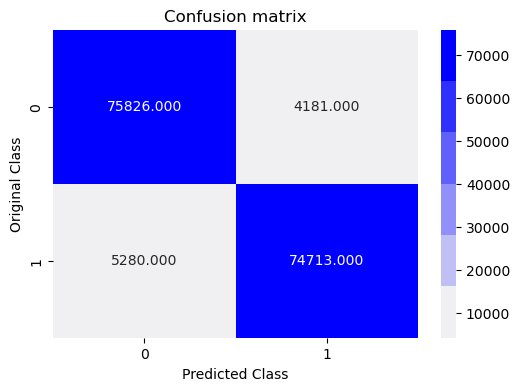

Test confusion_matrix


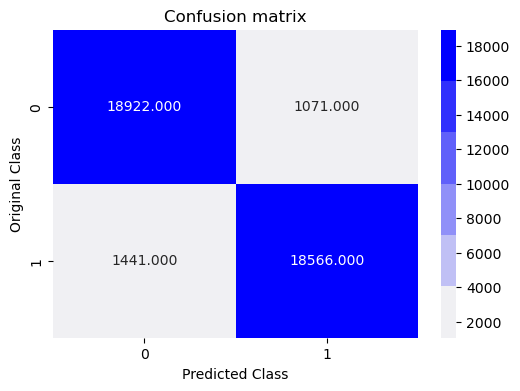

In [112]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [113]:
tf = pd.read_csv('test_data_new.csv')
tf

,From,To,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0


In [114]:
tf = tf.rename(columns={'From': 'from', 'To': 'to'})
tf

,from,to,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0


In [115]:
# X_kag=tf[['from', 'to','in_degree','out_degree','jaccard_coeff','common_followers','common_following','follow+following','transitive']]
# X_kag

X_kag= tf[['from', 'to','SrcOutegree','SrcIndegree','Jaccard_Coefficient','Preferential_Attachment_Score']]

In [78]:
X_kag

,from,to,SrcOutegree,SrcIndegree,Jaccard_Coefficient,cosine_similarity,Preferential_Attachment_Score
0,3360982,4457271,1964,140,0.036205,0.107235,542724
1,4761876,4698439,123,69,0.000000,0.000000,3096
2,4198430,3615486,6996,248,0.000000,0.000000,212010
3,2945770,747948,289,224,0.010352,0.030766,26412
4,3950088,3360335,1309,161,0.025965,0.078795,244980
...,...,...,...,...,...,...,...
1995,3116985,2415415,449,118,0.015544,0.030937,338519
1996,265459,842701,3947,149,0.003686,0.007753,8052380
1997,2547139,4332939,131,50,0.033784,0.126511,1562
1998,2366264,1815056,107,10,0.008264,0.028618,1221


In [116]:
y_test_pred = clf.predict(X_kag)
y_test_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [117]:
arr = np.array(y_test_pred)
zero_count = np.count_nonzero(arr == 0)
print(zero_count)

683


In [118]:
tf['Predictions'] = arr
tf

,from,to,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends,Predictions
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0,1
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0,0
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0,1
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0,1
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0,1
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0,1
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0,1
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0,0


In [119]:
tf['Id'] = range(1, 2001)
tf

,from,to,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends,Predictions,Id
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0,1,1
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0,0,2
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0,1,3
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0,1,4
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0,1,1996
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0,1,1997
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0,1,1998
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0,0,1999


In [120]:
X = tf[['Id', 'Predictions']]
X

,Id,Predictions
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,1
1996,1997,1
1997,1998,1
1998,1999,0


In [122]:
csv_file_path = 'ans_8.csv'
X.to_csv(csv_file_path, index=False)

In [58]:
#using only DT

In [86]:
df = pd.read_csv('combined_df_final.csv')
df

,from,to,Y,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,Jaccard_Coefficient,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends
0,134467,118071,0,495,14236,1,0,0.000000,0.000000,14240,0,0
1,360019,1209763,0,110,1951,1,0,0.000000,0.000000,1957,0,0
2,3471496,2785636,0,13,27,2,0,0.000000,0.000000,66,0,0
3,1859805,4116916,0,24,91,1,0,0.000000,0.000000,99,0,0
4,2888367,1054895,0,17,39,1,0,0.000000,0.000000,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,63691,4807146,1,286,13198,3,0,0.000000,0.000000,39675,0,0
199996,2882075,1625297,1,668,37638,39,0,0.000847,0.026367,1472913,0,0
199997,2150983,4286292,1,337,49384,1,0,0.000000,0.000000,49587,0,0
199998,2855754,2169630,1,493,2435,425,2972,0.066382,0.125044,7480473,1,1


In [87]:
X = df[['from', 'to','SrcOutegree','SrcIndegree','Jaccard_Coefficient','cosine_similarity','Preferential_Attachment_Score']]
y = df['Y']

In [88]:
X

,from,to,SrcOutegree,SrcIndegree,Jaccard_Coefficient,cosine_similarity,Preferential_Attachment_Score
0,134467,118071,14236,495,0.000000,0.000000,14240
1,360019,1209763,1951,110,0.000000,0.000000,1957
2,3471496,2785636,27,13,0.000000,0.000000,66
3,1859805,4116916,91,24,0.000000,0.000000,99
4,2888367,1054895,39,17,0.000000,0.000000,40
...,...,...,...,...,...,...,...
199995,63691,4807146,13198,286,0.000000,0.000000,39675
199996,2882075,1625297,37638,668,0.000847,0.026367,1472913
199997,2150983,4286292,49384,337,0.000000,0.000000,49587
199998,2855754,2169630,2435,493,0.066382,0.125044,7480473


In [89]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    1
199996    1
199997    1
199998    1
199999    1
Name: Y, Length: 200000, dtype: int64

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have a DataFrame 'data' with features and labels
# 'features' are the features for classification, and 'labels' are the binary labels (0 for invalid, 1 for valid edges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict labels on the test set
predicted_labels = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_labels)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")



Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
ROC AUC Score: 0.91


In [91]:
predicted_labels = model.predict(X_kag)

In [92]:
predicted_labels

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [93]:
arr = np.array(predicted_labels)
zero_count = np.count_nonzero(arr == 0)
print(zero_count)

717


In [94]:
tf['Predictions'] = arr
tf

,from,to,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends,Predictions,Id
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0,1,1
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0,0,2
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0,0,3
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0,1,4
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0,1,1996
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0,1,1997
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0,1,1998
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0,1,1999


In [95]:
tf['Id'] = range(1, 2001)
tf

,from,to,Jaccard_Coefficient,SrcIndegree,SrcOutegree,dest_indegree,dest_outdegree,cosine_similarity,Preferential_Attachment_Score,Friends_Measure,Opposite_Direction_Friends,Predictions,Id
0,3360982,4457271,0.036205,140,1964,93,242,0.107235,542724,1,0,1,1
1,4761876,4698439,0.000000,69,123,18,0,0.000000,3096,0,0,0,2
2,4198430,3615486,0.000000,248,6996,30,0,0.000000,212010,0,0,0,3
3,2945770,747948,0.010352,224,289,62,0,0.030766,26412,0,0,1,4
4,3950088,3360335,0.025965,161,1309,180,0,0.078795,244980,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,0.015544,118,449,673,0,0.030937,338519,0,0,1,1996
1996,265459,842701,0.003686,149,3947,236,1994,0.007753,8052380,1,0,1,1997
1997,2547139,4332939,0.033784,50,131,11,0,0.126511,1562,0,0,1,1998
1998,2366264,1815056,0.008264,10,107,11,0,0.028618,1221,0,0,1,1999


In [96]:
X = tf[['Id', 'Predictions']]
X

,Id,Predictions
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
1995,1996,1
1996,1997,1
1997,1998,1
1998,1999,1


In [97]:
csv_file_path = 'ans_8.csv'
X.to_csv(csv_file_path, index=False)

In [70]:
######

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from torch_geometric.utils import add_self_loops

import numpy as np
import networkx as nx
import random

# Create a random directed graph (replace this with your own graph data)
# For simplicity, we use a small random graph as an example.
random.seed(42)
np.random.seed(42)

edges = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (4, 0), (4, 1)]
G = nx.DiGraph(edges)
num_nodes = G.number_of_nodes()
num_classes = 2  # Number of classes for node classification

# Convert the graph to a PyTorch Geometric Data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
data = Data(edge_index=edge_index, num_nodes=num_nodes)

# Add self-loops to the adjacency matrix
data.edge_index = add_self_loops(data.edge_index, num_nodes=num_nodes)[0]

# Create random node features (replace this with your own features)
num_features = 64
data.x = torch.randn(num_nodes, num_features)

# Define a simple GCN model
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)
    
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize and train the GCN model
model = GCN(num_features, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Define a simple training loop (replace this with your own data loading and training process)
def train():
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = F.nll_loss(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Train the model for a few epochs (replace this with your training loop)
for epoch in range(100):
    train()

# Perform node classification (replace this with your edge prediction task)
model.eval()
output = model(data.x, data.edge_index)
predicted_labels = output.argmax(dim=1)

# Print the predicted labels
print("Predicted Labels:", predicted_labels)


ModuleNotFoundError: No module named 'torch'